In [1]:
import pandas as pd             
import numpy as np

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   

import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv('./data/train.csv')

In [3]:
train_data.shape

(523021, 36)

In [4]:
train_data.head()

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,495,...,1,11.0,16,-2,70,1029,1,6.0,0.0,23
1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,608,...,3,13.0,10,-2,58,1025,1,10.0,0.0,56
2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,665,...,3,11.0,10,-3,55,1023,2,8.0,0.0,22
3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,630,...,3,15.0,10,-6,25,1022,-1,10.0,0.0,108
4,1000,06/03/2016,0,0,0,Hyper Market,General,326,7,0,...,1,12.0,5,-6,48,1022,-5,5.0,0.0,46


In [5]:
train_data.describe()

,StoreID,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,NumberOfCustomers,NumberOfSales,Region_AreaKM2,Region_GDP,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
count,523021.000000,523021.000000,523021.000000,523021.000000,523021.00000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,...,523021.000000,511683.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,511683.000000,523021.000000,523021.000000
mean,1373.953914,0.029718,0.829714,0.383292,8002.71122,5.713151,259.325073,4057.377536,12381.265718,14050.547848,...,10.273205,12.151025,11.724961,3.737584,51.375624,1012.078435,6.202315,7.223408,0.808278,170.458096
std,216.395820,0.169808,0.375884,0.486189,11537.70753,3.357190,185.857102,2729.630381,9140.692427,2755.425404,...,7.041167,4.978385,5.791031,5.909098,19.284023,8.699236,6.312993,4.899575,2.631428,101.728193
min,1000.000000,0.000000,0.000000,0.000000,47.00000,0.000000,0.000000,0.000000,344.000000,9893.000000,...,-13.000000,0.000000,2.000000,-18.000000,10.000000,970.000000,-15.000000,0.000000,0.000000,-1.000000
25%,1187.000000,0.000000,1.000000,0.000000,1057.00000,3.000000,166.000000,2573.000000,7215.000000,11849.000000,...,4.000000,NaN,8.000000,-1.000000,36.000000,1007.000000,1.000000,NaN,0.000000,75.000000
50%,1373.000000,0.000000,1.000000,0.000000,3321.00000,6.000000,251.000000,4020.000000,9643.000000,15017.000000,...,11.000000,NaN,11.000000,4.000000,51.000000,1013.000000,7.000000,NaN,0.000000,191.000000
75%,1561.000000,0.000000,1.000000,1.000000,9673.00000,9.000000,345.000000,5538.000000,15566.000000,15931.000000,...,16.000000,NaN,14.000000,8.000000,66.000000,1018.000000,11.000000,NaN,0.250000,250.000000
max,1748.000000,1.000000,1.000000,1.000000,85070.00000,10.000000,2206.000000,26641.000000,32221.000000,23931.000000,...,30.000000,31.000000,53.000000,18.000000,100.000000,1038.000000,24.000000,31.000000,58.930000,360.000000


In [6]:
train_data.describe(exclude=[np.number])

,Date,StoreType,AssortmentType,Events
count,523021,523021,523021,398923
unique,729,4,3,21
top,02/07/2016,Hyper Market,General,Rain
freq,749,292769,296188,204733


In [7]:
categorical_variables_mask = train_data.dtypes==object
categorical_variables = train_data.columns[categorical_variables_mask].tolist()
numerical_variables = train_data.columns[~categorical_variables_mask].tolist()
numerical_variables.remove('NumberOfSales')

In [8]:
numerical_variables

['StoreID',
 'IsHoliday',
 'IsOpen',
 'HasPromotions',
 'NearestCompetitor',
 'Region',
 'NumberOfCustomers',
 'Region_AreaKM2',
 'Region_GDP',
 'Region_PopulationK',
 'CloudCover',
 'Max_Dew_PointC',
 'Max_Gust_SpeedKm_h',
 'Max_Humidity',
 'Max_Sea_Level_PressurehPa',
 'Max_TemperatureC',
 'Max_VisibilityKm',
 'Max_Wind_SpeedKm_h',
 'Mean_Dew_PointC',
 'Mean_Humidity',
 'Mean_Sea_Level_PressurehPa',
 'Mean_TemperatureC',
 'Mean_VisibilityKm',
 'Mean_Wind_SpeedKm_h',
 'Min_Dew_PointC',
 'Min_Humidity',
 'Min_Sea_Level_PressurehPa',
 'Min_TemperatureC',
 'Min_VisibilitykM',
 'Precipitationmm',
 'WindDirDegrees']

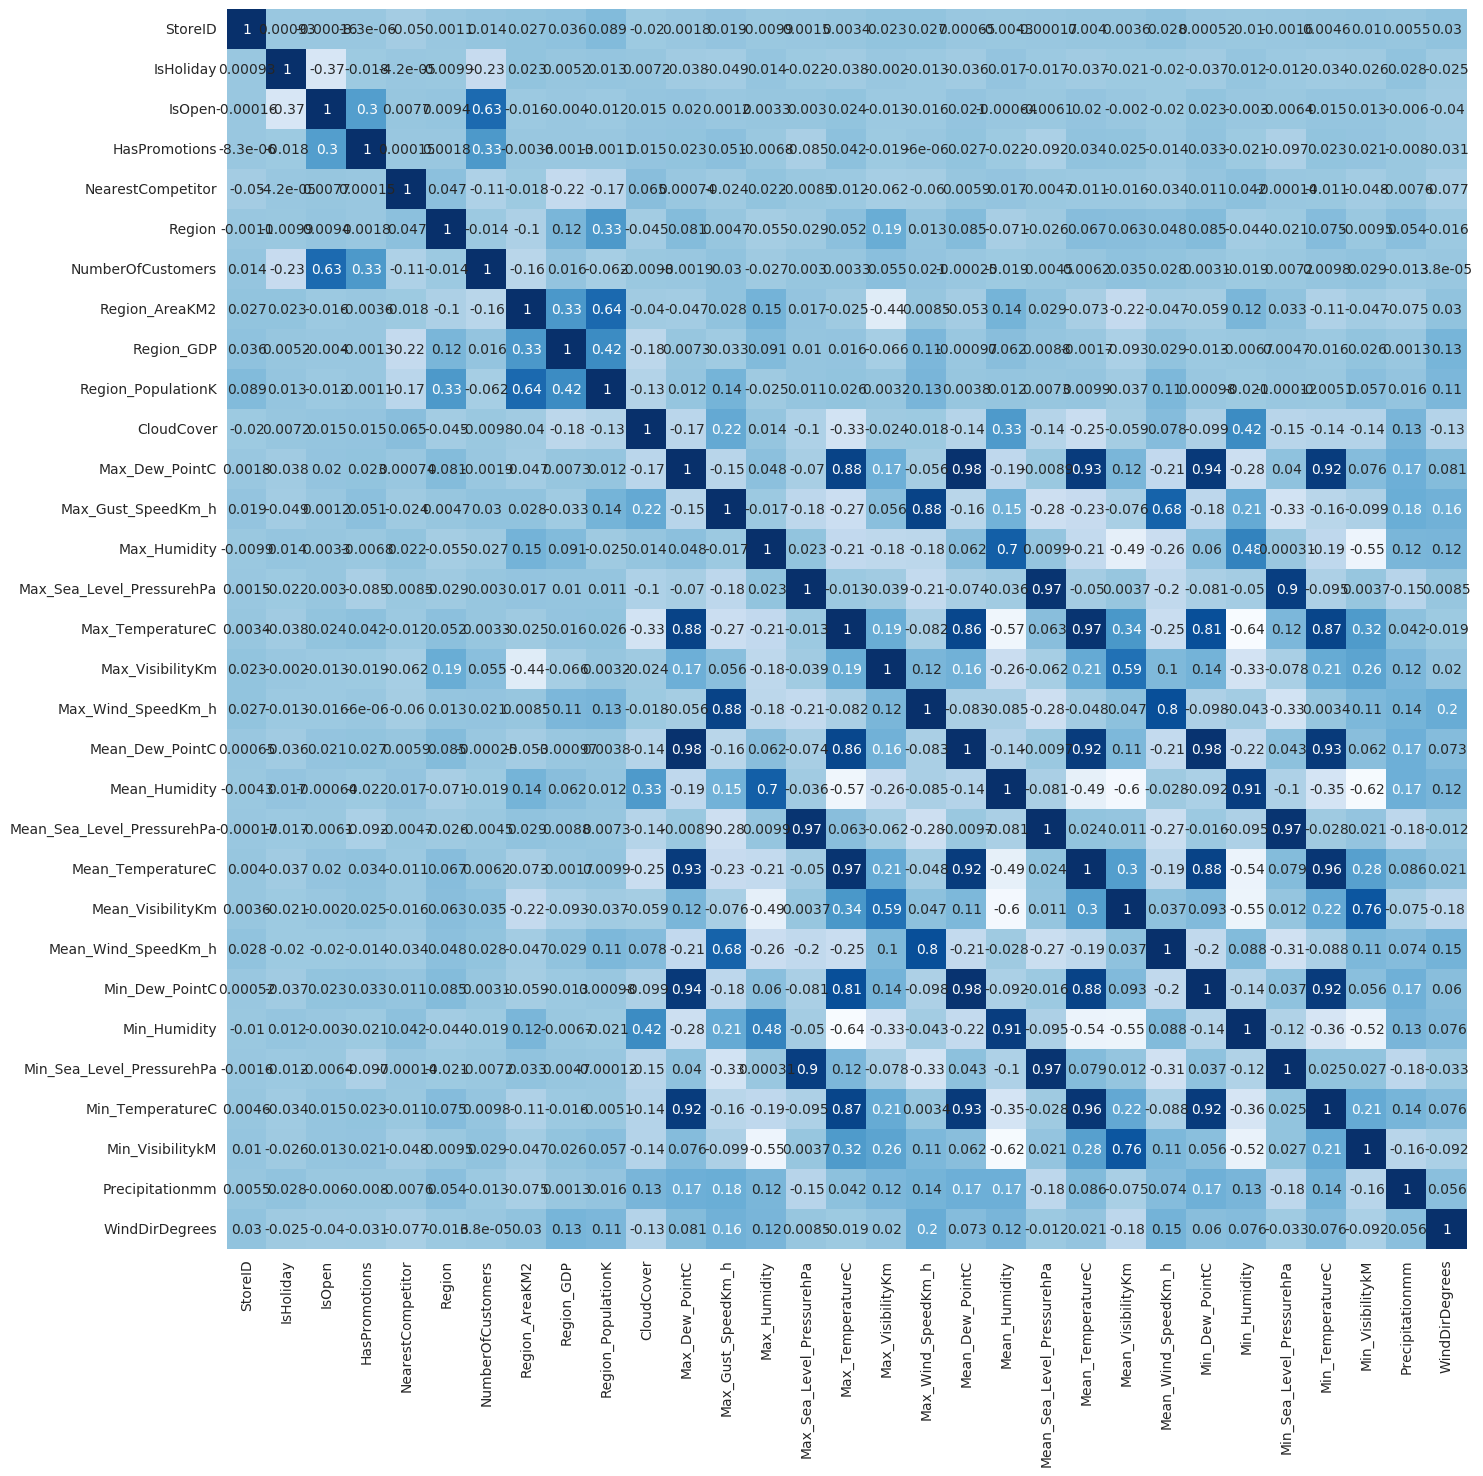

In [14]:
cov=train_data[numerical_variables].corr(method='pearson')
plt.figure(figsize = (16,16))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

# Variables Analysis

Hyper Market       292769
Standard Market    148986
Super Market        74705
Shopping Center      6561
Name: StoreType, dtype: int64
Null Values:  False


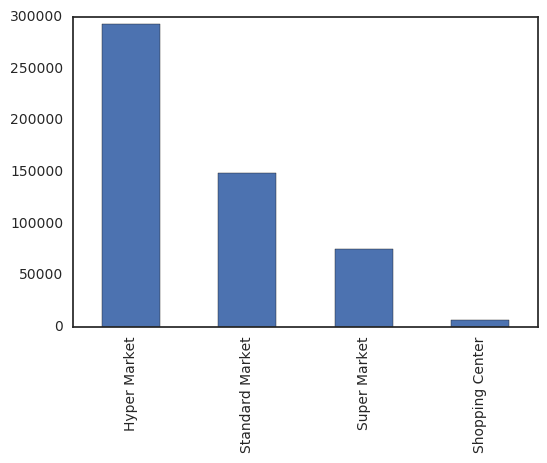

In [38]:
#StoreType: 4 types
print(train_data['StoreType'].value_counts())
print("Null Values: ",train_data['StoreType'].isnull().any())
train_data['StoreType'].value_counts().plot.bar()

General                     296188
With Non-Food Department    224646
With Fish Department          2187
Name: AssortmentType, dtype: int64
Null Values:  False


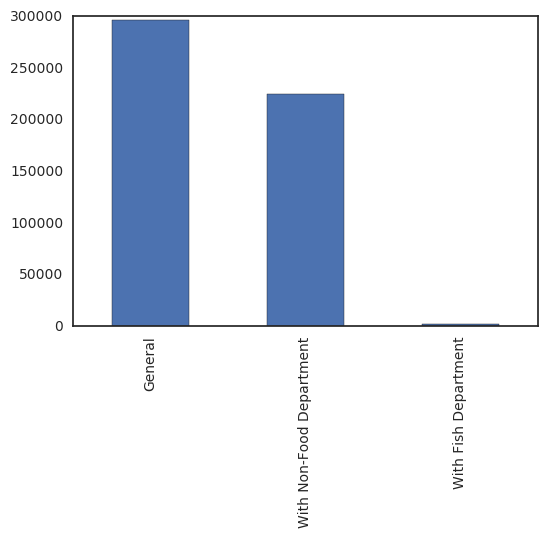

In [39]:
#AssortmentType
print(train_data['AssortmentType'].value_counts())
print("Null Values: ",train_data['AssortmentType'].isnull().any())
train_data['AssortmentType'].value_counts().plot.bar()

1759    4728
370     4374
516     3645
62      3645
209     3645
Name: NearestCompetitor, dtype: int64
Null Values:  False


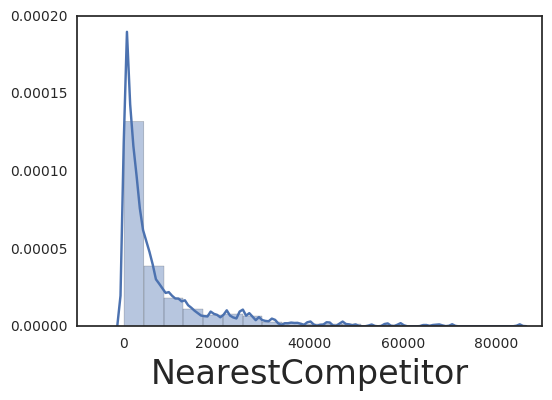

In [56]:
#NearestCompetitor
print(train_data['NearestCompetitor'].value_counts().head())
print("Null Values: ",train_data['NearestCompetitor'].isnull().any())
hist1 = sns.distplot(train_data['NearestCompetitor'],bins=20)

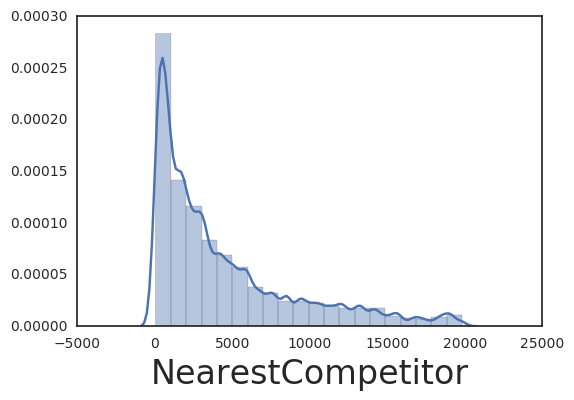

In [57]:
hist2 = sns.distplot(train_data[train_data['NearestCompetitor']<20000]['NearestCompetitor'],bins=20)

0      89095
221     2364
243     2356
241     2356
217     2342
Name: NumberOfCustomers, dtype: int64
Null Values:  False


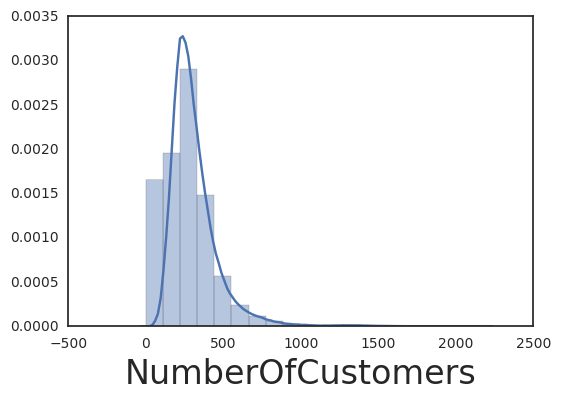

In [55]:
#NumberOfCustomers
print(train_data['NumberOfCustomers'].value_counts().head())
print("Null Values: ",train_data['NumberOfCustomers'].isnull().any())
hist1 = sns.distplot(train_data['NumberOfCustomers'],bins=20)

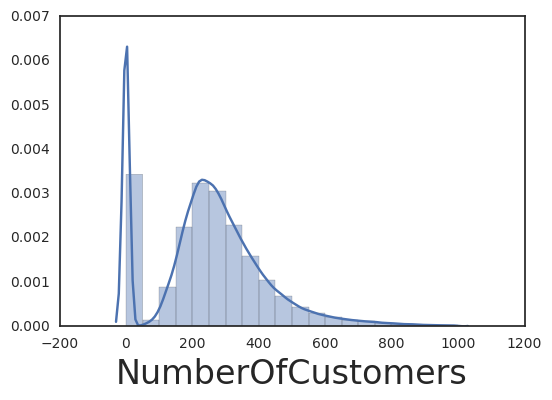

In [58]:
hist2 = sns.distplot(train_data[train_data['NumberOfCustomers']<1000]['NumberOfCustomers'],bins=20)

0       89095
4248      182
3952      180
3984      176
3438      174
Name: NumberOfSales, dtype: int64
Null Values:  False


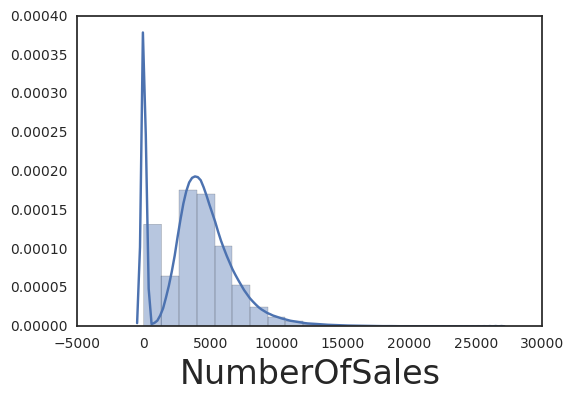

In [59]:
#NumberOfSales: TARGET 
print(train_data['NumberOfSales'].value_counts().head())
print("Null Values: ",train_data['NumberOfSales'].isnull().any())
hist1 = sns.distplot(train_data['NumberOfSales'],bins=20)

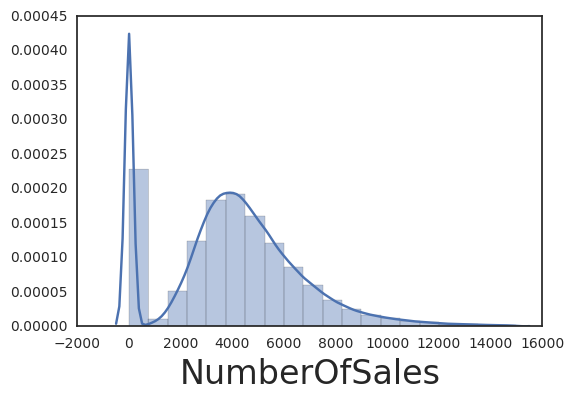

In [60]:
hist2 = sns.distplot(train_data[train_data['NumberOfSales']<15000]['NumberOfSales'],bins=20)

15566    123201
32221     68125
407       67068
7215      64881
9643      45198
Name: Region_AreaKM2, dtype: int64
Null Values:  False


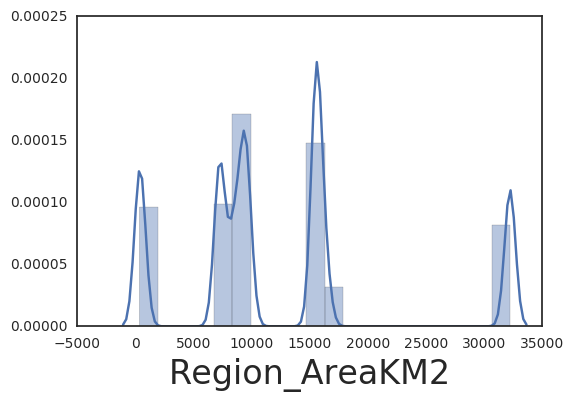

In [61]:
#Region_AreaKM2
print(train_data['Region_AreaKM2'].value_counts().head())
print("Null Values: ",train_data['Region_AreaKM2'].isnull().any())
hist1 = sns.distplot(train_data['Region_AreaKM2'],bins=20)

In [64]:
#Region: 10 regions
print(train_data['Region'].value_counts())

9     123201
2      68125
3      67068
10     64881
7      45198
0      40095
5      37179
6      26244
8      20412
1      17496
4      13122
Name: Region, dtype: int64


15017    123201
16186     68125
13155     67068
11849     64881
17130     45198
Name: Region_GDP, dtype: int64
Null Values:  False


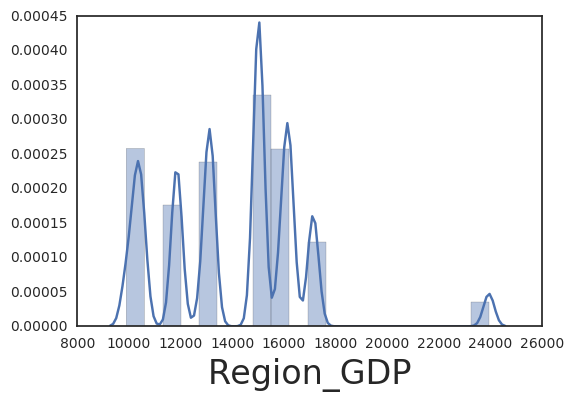

In [68]:
#Region_GDP
print(train_data['Region_GDP'].value_counts().head())
print("Null Values: ",train_data['Region_GDP'].isnull().any())
hist1 = sns.distplot(train_data['Region_GDP'],bins=20)

8146    123201
5727     68125
1584     67068
1293     64881
2770     45198
Name: Region_PopulationK, dtype: int64
Null Values:  False


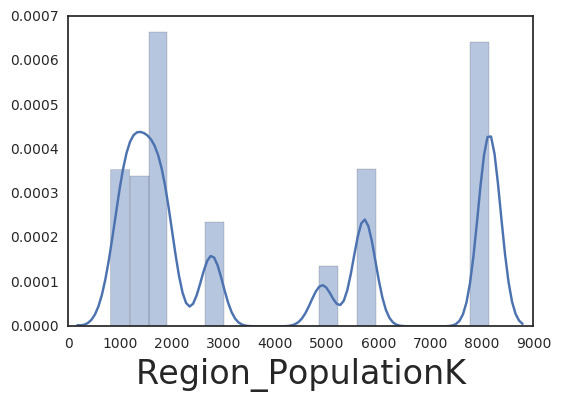

In [105]:
#Region_PopulationK
print(train_data['Region_PopulationK'].value_counts().head())
print("Null Values: ",train_data['Region_PopulationK'].isnull().any())
hist1 = sns.distplot(train_data['Region_PopulationK'],bins=20)

In [75]:
#CloudCover 0-9
print(train_data['CloudCover'].value_counts().head())
print("Null Values: ",train_data['CloudCover'].isnull().any())
print(train_data['CloudCover'].isnull().value_counts())
#hist1 = sns.distplot(train_data['CloudCover'],bins=4)

6.0    151029
7.0     90949
5.0     80265
8.0     53258
4.0     45145
Name: CloudCover, dtype: int64
Null Values:  True
False    481840
True      41181
Name: CloudCover, dtype: int64


Rain                 204733
Fog                   67797
Fog-Rain              50908
Rain-Thunderstorm     21988
Rain-Snow             18176
Name: Events, dtype: int64
Null Values:  True
False    398923
True     124098
Name: Events, dtype: int64


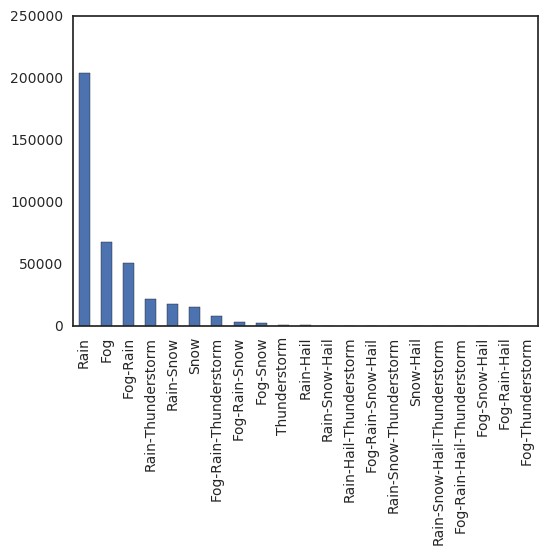

In [78]:
#Events
print(train_data['Events'].value_counts().head())
print("Null Values: ",train_data['Events'].isnull().any())
print(train_data['Events'].isnull().value_counts())
train_data['Events'].value_counts().plot.bar()

12    36761
13    33391
11    32008
4     30644
3     29826
Name: Max_Dew_PointC, dtype: int64
Null Values:  False


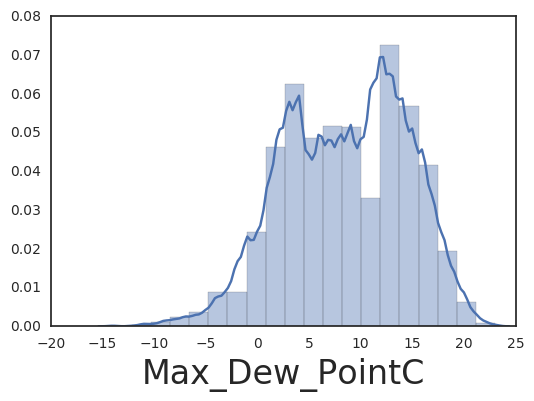

In [124]:
#Max_Dew_PointC
print(train_data['Max_Dew_PointC'].value_counts().head())
print("Null Values: ",train_data['Max_Dew_PointC'].isnull().any())
hist1 = sns.distplot(train_data['Max_Dew_PointC'],bins=20)

50.0    7545
45.0    7389
47.0    7163
42.0    7105
40.0    5996
Name: Max_Gust_SpeedKm_h, dtype: int64
Null Values:  True
True     409947
False    113074
Name: Max_Gust_SpeedKm_h, dtype: int64


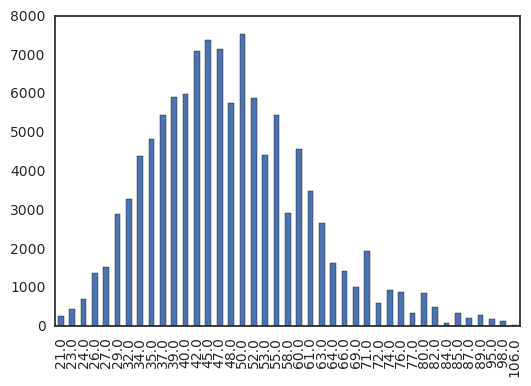

In [126]:
#Max_Gust_SpeedKm_h
print(train_data['Max_Gust_SpeedKm_h'].value_counts().head())
print("Null Values: ",train_data['Max_Gust_SpeedKm_h'].isnull().any())
print(train_data['Max_Gust_SpeedKm_h'].isnull().value_counts())
train_data['Max_Gust_SpeedKm_h'].value_counts().sort_index().plot.bar()

100    203949
94      76383
93      60843
87      29635
88      28788
Name: Max_Humidity, dtype: int64
Null Values:  False


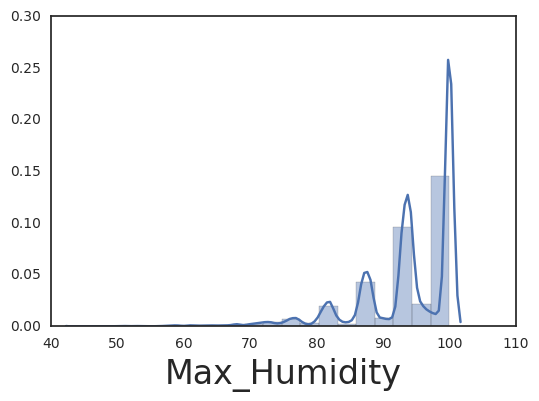

In [127]:
#Max_Humidity
print(train_data['Max_Humidity'].value_counts().head())
print("Null Values: ",train_data['Max_Humidity'].isnull().any())
hist1 = sns.distplot(train_data['Max_Humidity'],bins=20)

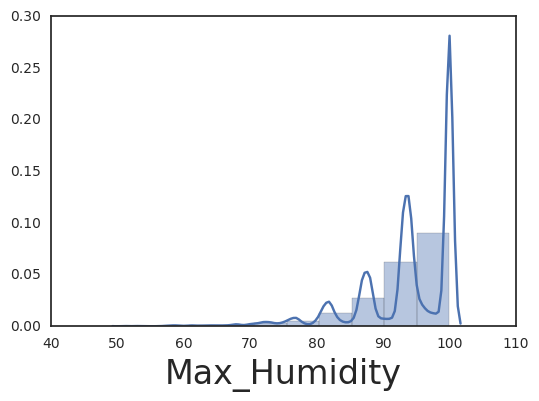

In [112]:
hist2 = sns.distplot(train_data[train_data['Max_Humidity']>50]['Max_Humidity'],bins=10)

1020    29605
1019    29342
1016    28460
1021    27892
1022    27210
Name: Max_Sea_Level_PressurehPa, dtype: int64
Null Values:  False


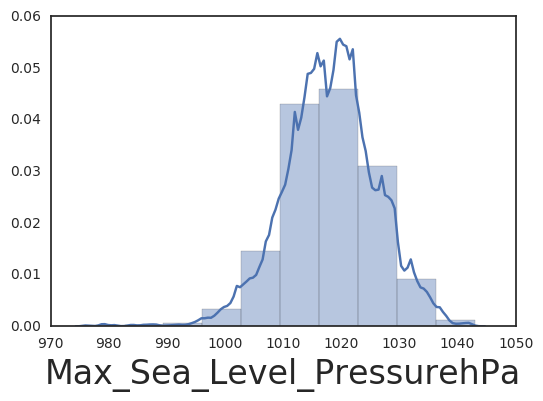

In [115]:
#Max_Sea_Level_PressurehPa
print(train_data['Max_Sea_Level_PressurehPa'].value_counts().head())
print("Null Values: ",train_data['Max_Sea_Level_PressurehPa'].isnull().any())
hist2 = sns.distplot(train_data['Max_Sea_Level_PressurehPa'],bins=10)

19    27326
18    25461
22    22967
11    22708
6     22612
Name: Max_TemperatureC, dtype: int64
Null Values:  False


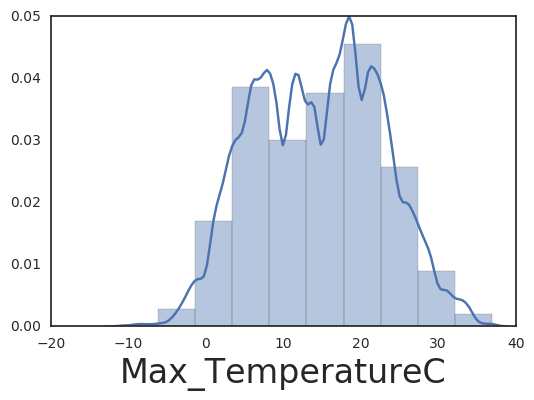

In [117]:
#Max_TemperatureC
print(train_data['Max_TemperatureC'].value_counts().head())
print("Null Values: ",train_data['Max_TemperatureC'].isnull().any())
hist2 = sns.distplot(train_data['Max_TemperatureC'],bins=10)

31.0    264533
10.0    106800
26.0     40820
19.0     18130
27.0     14168
Name: Max_VisibilityKm, dtype: int64
Null Values:  True
False    511683
True      11338
Name: Max_VisibilityKm, dtype: int64


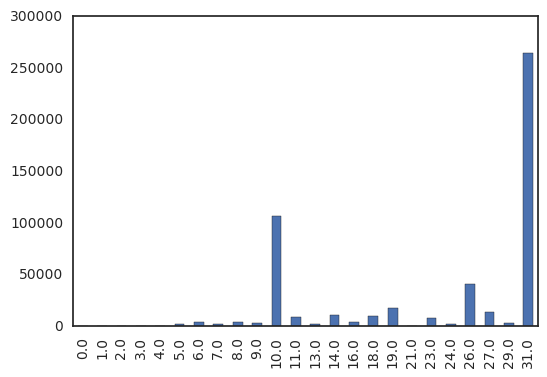

In [123]:
#Max_VisibilityKm
print(train_data['Max_VisibilityKm'].value_counts().head())
print("Null Values: ",train_data['Max_VisibilityKm'].isnull().any())
print(train_data['Max_VisibilityKm'].isnull().value_counts())
train_data['Max_VisibilityKm'].value_counts().sort_index().plot.bar()

14    62594
26    50438
21    49065
19    43953
23    39205
Name: Max_Wind_SpeedKm_h, dtype: int64
Null Values:  False


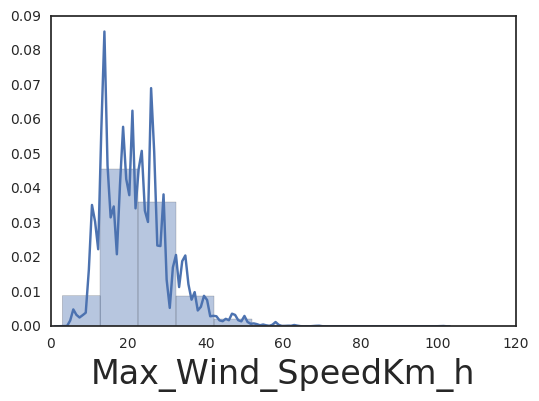

In [128]:
#Max_Wind_SpeedKm_h
print(train_data['Max_Wind_SpeedKm_h'].value_counts().head())
print("Null Values: ",train_data['Max_Wind_SpeedKm_h'].isnull().any())
hist2 = sns.distplot(train_data['Max_Wind_SpeedKm_h'],bins=10)

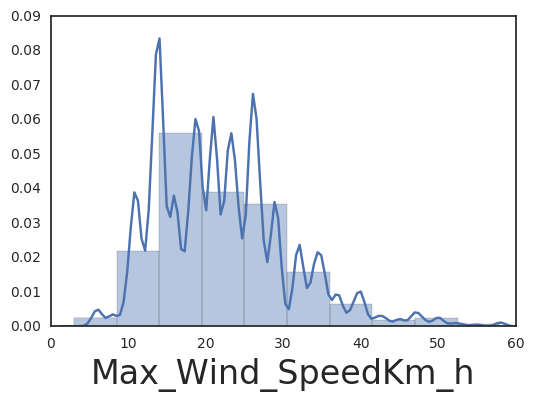

In [129]:
hist2 = sns.distplot(train_data[train_data['Max_Wind_SpeedKm_h']<60]['Max_Wind_SpeedKm_h'],bins=10)

11    38722
9     37230
2     36453
12    33464
8     32180
Name: Mean_Dew_PointC, dtype: int64
Null Values:  False


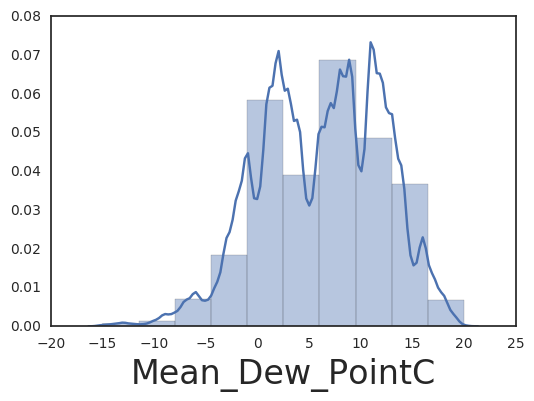

In [130]:
#Mean_Dew_PointC
print(train_data['Mean_Dew_PointC'].value_counts().head())
print("Null Values: ",train_data['Mean_Dew_PointC'].isnull().any())
hist2 = sns.distplot(train_data['Mean_Dew_PointC'],bins=10)

78    16582
80    16422
77    16058
86    15624
81    15607
Name: Mean_Humidity, dtype: int64
Null Values:  False


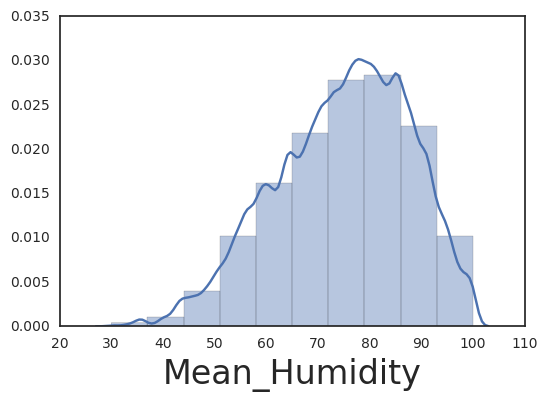

In [131]:
#Mean_Humidity
print(train_data['Mean_Humidity'].value_counts().head())
print("Null Values: ",train_data['Mean_Humidity'].isnull().any())
hist2 = sns.distplot(train_data['Mean_Humidity'],bins=10)

1016    28785
1015    28384
1017    28008
1014    27845
1019    27673
Name: Mean_Sea_Level_PressurehPa, dtype: int64
Null Values:  False


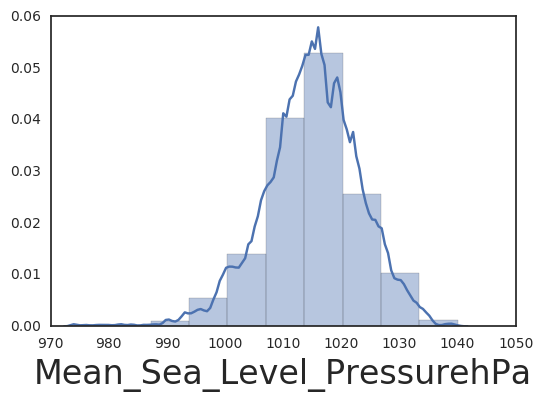

In [132]:
#Mean_Sea_Level_PressurehPa
print(train_data['Mean_Sea_Level_PressurehPa'].value_counts().head())
print("Null Values: ",train_data['Mean_Sea_Level_PressurehPa'].isnull().any())
hist2 = sns.distplot(train_data['Mean_Sea_Level_PressurehPa'],bins=10)

14    33841
16    32390
13    31284
3     26915
6     26870
Name: Mean_TemperatureC, dtype: int64
Null Values:  False


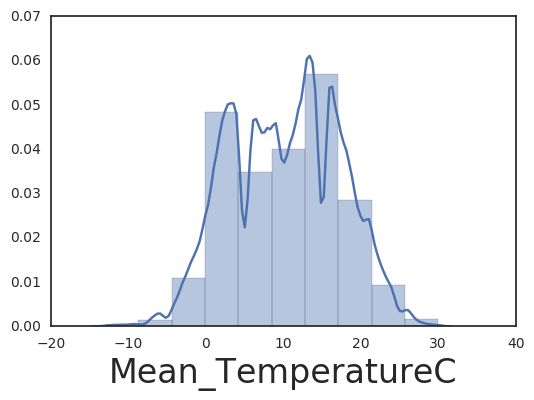

In [133]:
#Mean_TemperatureC
print(train_data['Mean_TemperatureC'].value_counts().head())
print("Null Values: ",train_data['Mean_TemperatureC'].isnull().any())
hist2 = sns.distplot(train_data['Mean_TemperatureC'],bins=10)

10.0    98204
12.0    54105
13.0    49575
11.0    49189
9.0     41085
Name: Mean_VisibilityKm, dtype: int64
Null Values:  True
False    511683
True      11338
Name: Mean_VisibilityKm, dtype: int64


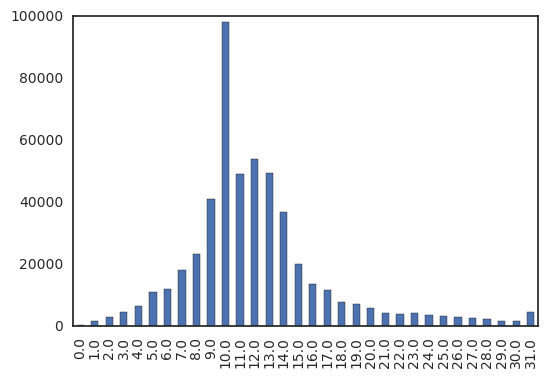

In [135]:
#Mean_VisibilityKm
print(train_data['Mean_VisibilityKm'].value_counts().head())
print("Null Values: ",train_data['Mean_VisibilityKm'].isnull().any())
print(train_data['Mean_VisibilityKm'].isnull().value_counts())
train_data['Mean_VisibilityKm'].value_counts().sort_index().plot.bar()

8     71021
6     68632
10    68060
11    61843
13    50305
Name: Mean_Wind_SpeedKm_h, dtype: int64
Null Values:  False


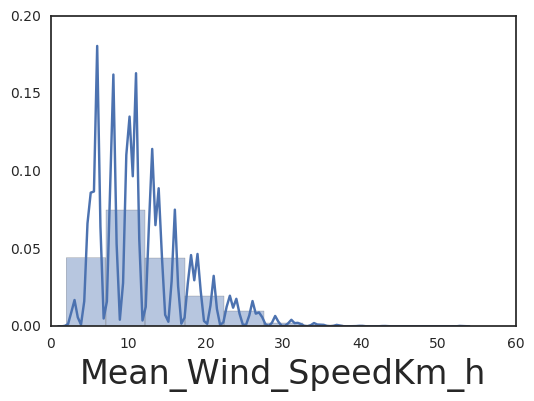

In [136]:
#Mean_Wind_SpeedKm_h
print(train_data['Mean_Wind_SpeedKm_h'].value_counts().head())
print("Null Values: ",train_data['Mean_Wind_SpeedKm_h'].isnull().any())
hist2 = sns.distplot(train_data['Mean_Wind_SpeedKm_h'],bins=10)

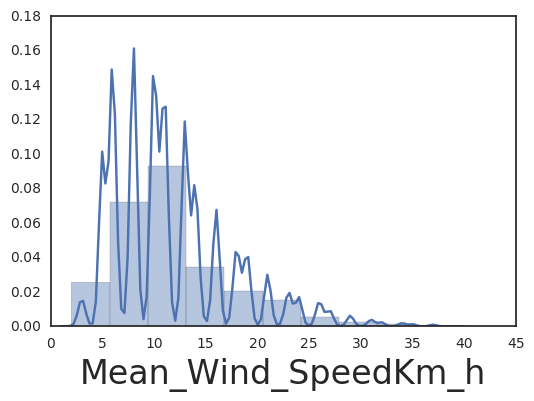

In [137]:
hist2 = sns.distplot(train_data[train_data['Mean_Wind_SpeedKm_h']<40]['Mean_Wind_SpeedKm_h'],bins=10)

 8    35807
 7    34383
-1    33069
 1    32708
 9    30783
Name: Min_Dew_PointC, dtype: int64
Null Values:  False


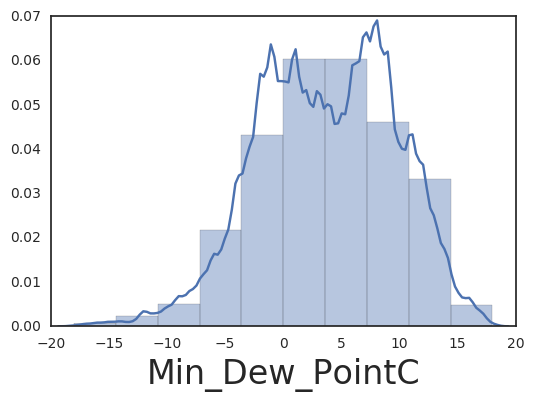

In [138]:
#Min_Dew_PointC
print(train_data['Min_Dew_PointC'].value_counts().head())
print("Null Values: ",train_data['Min_Dew_PointC'].isnull().any())
hist2 = sns.distplot(train_data['Min_Dew_PointC'],bins=10)

52    11685
59    11667
50    11096
43    10832
41    10790
Name: Min_Humidity, dtype: int64
Null Values:  False


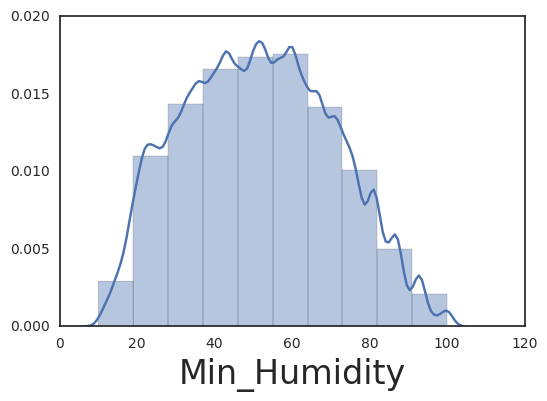

In [139]:
#Min_Humidity
print(train_data['Min_Humidity'].value_counts().head())
print("Null Values: ",train_data['Min_Humidity'].isnull().any())
hist2 = sns.distplot(train_data['Min_Humidity'],bins=10)

1014    28548
1013    26468
1011    26428
1012    24981
1016    24551
Name: Min_Sea_Level_PressurehPa, dtype: int64
Null Values:  False


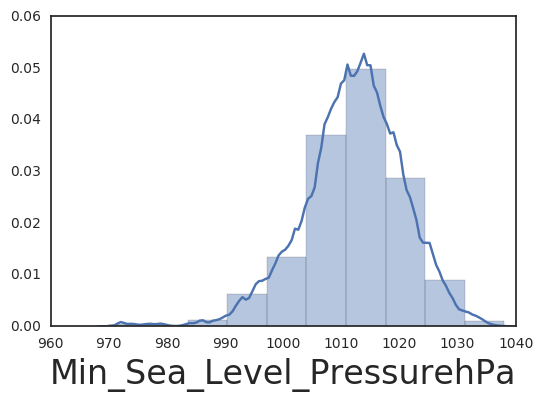

In [140]:
#Min_Sea_Level_PressurehPa
print(train_data['Min_Sea_Level_PressurehPa'].value_counts().head())
print("Null Values: ",train_data['Min_Sea_Level_PressurehPa'].isnull().any())
hist2 = sns.distplot(train_data['Min_Sea_Level_PressurehPa'],bins=10)

1     33212
8     33096
9     31464
11    31307
12    28777
Name: Min_TemperatureC, dtype: int64
Null Values:  False


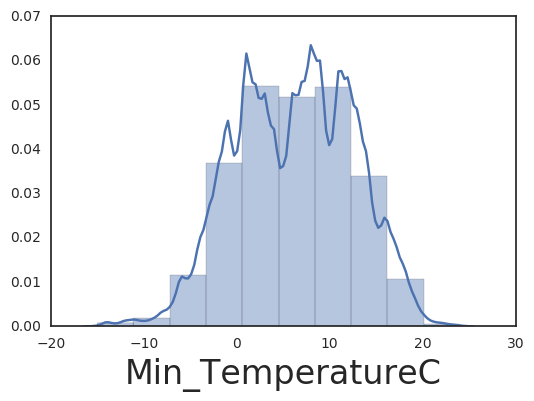

In [142]:
#Min_TemperatureC
print(train_data['Min_TemperatureC'].value_counts().head())
print("Null Values: ",train_data['Min_TemperatureC'].isnull().any())
hist2 = sns.distplot(train_data['Min_TemperatureC'],bins=10)

10.0    194822
3.0      47917
5.0      47504
6.0      42929
0.0      39277
Name: Min_VisibilitykM, dtype: int64
Null Values:  True
False    511683
True      11338
Name: Min_VisibilitykM, dtype: int64


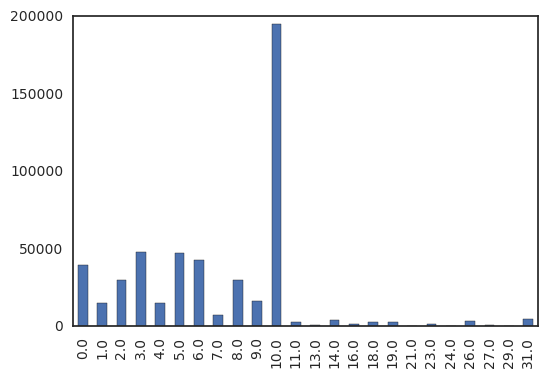

In [144]:
#Min_VisibilitykM
print(train_data['Min_VisibilitykM'].value_counts().head())
print("Null Values: ",train_data['Min_VisibilitykM'].isnull().any())
print(train_data['Min_VisibilitykM'].isnull().value_counts())
train_data['Min_VisibilitykM'].value_counts().sort_index().plot.bar()

0.00    383426
0.25     22608
2.03     21327
1.02     18653
0.51     17134
Name: Precipitationmm, dtype: int64
Null Values:  False


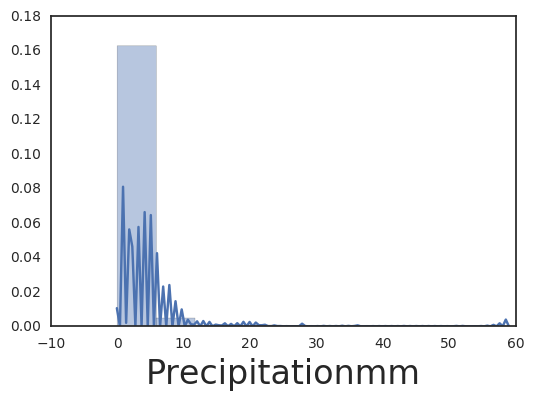

In [145]:
#Precipitationmm
print(train_data['Precipitationmm'].value_counts().head())
print("Null Values: ",train_data['Precipitationmm'].isnull().any())
hist2 = sns.distplot(train_data['Precipitationmm'],bins=10)

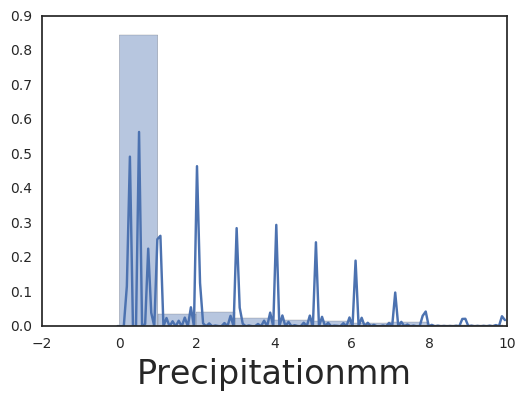

In [146]:
hist2 = sns.distplot(train_data[train_data['Precipitationmm']<10]['Precipitationmm'],bins=10)

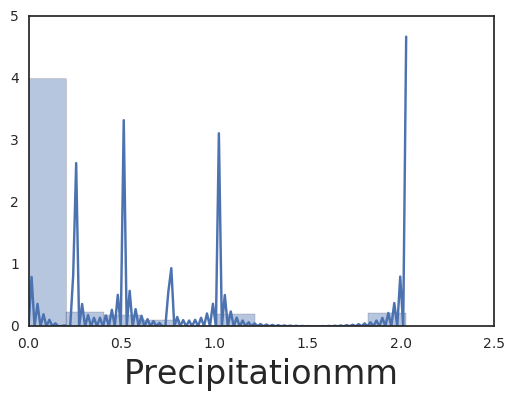

In [148]:
hist2 = sns.distplot(train_data[train_data['Precipitationmm']<3]['Precipitationmm'],bins=10)

-1      37558
 218     4016
 220     3386
 258     3260
 261     3224
Name: WindDirDegrees, dtype: int64
Null Values:  False


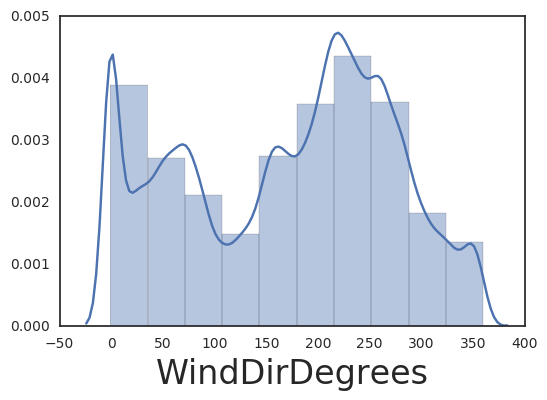

In [149]:
#WindDirDegrees
print(train_data['WindDirDegrees'].value_counts().head())
print("Null Values: ",train_data['WindDirDegrees'].isnull().any())
hist2 = sns.distplot(train_data['WindDirDegrees'],bins=10)